## Gamera Task 2

2a. Assuming the CMB as the target radiation field and a powerlaw electron spectrum with index -2, at what energy does the Klein-Nishina effect show up? What are the spectral indices in both the Thomson and Klein-Nishina limits? How does this depend on electron spectral index? How does it change for a "hotter" CMB?


2b. For a powerlaw electron spectrum, how does the synchrotron spectrum relate to the electron spectrum? What happens when you change the magnetic field?


In [1]:
import sys
sys.path.append('path/to/your/locally/installed/GAMERA/lib')
import gappa as gp

In [2]:
import numpy as np
import matplotlib.pyplot as plt


### Task 2a

First, we'll set up a function to calculate the Inverse Compton spectrum from an powerlaw electron population. The parameters to leave free are the electron spectral index and CMB temperature because we will vary these. 

In [24]:
def ic_spectrum(index,T_cmb,gamma_ray_energies):
    e = np.logspace(-4,8,200) * gp.TeV_to_erg # energy axis. Boundaries chosen super wide just to be safe, doesn't really matter
    power_law = e**-index # define power law, normalisation doesn't matter for this exercise
    particles = list(zip(e,power_law)) # input needs to be 2D-array
    fr = gp.Radiation()


    fr.AddThermalTargetPhotons(T_cmb,0.25*gp.eV_to_erg)# with CMB energy density in erg/cm3

    fr.SetDistance(2000)#parsec, doesn't really matter here
    fr.SetElectrons(particles)
    
    fr.CalculateDifferentialPhotonSpectrum(gamma_ray_energies)
    ic_spec=np.array(fr.GetICSpectrum())[:,1]

    return ic_spec

In [25]:
gamma_ray_energies=np.geomspace(1e-4,1e7,20) * gp.TeV_to_erg #Also here going super wide, but necessary to see Klein-Nishina in some cases
ic_spec_2_2p7K=ic_spectrum(2,2.7,gamma_ray_energies)

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



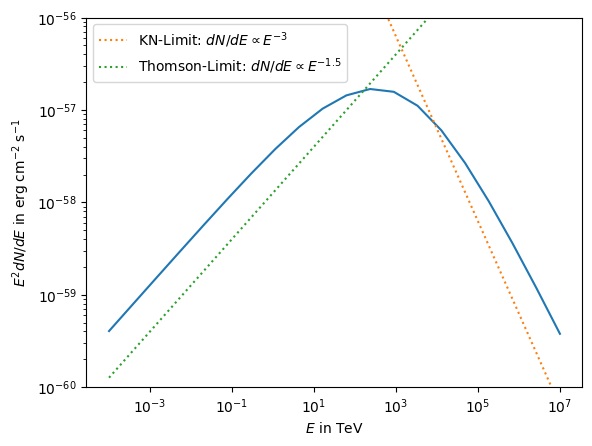

In [31]:
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,gamma_ray_energies**2*ic_spec_2_2p7K)

plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-53*gamma_ray_energies**-1,linestyle="dotted",label="KN-Limit: $dN/dE\propto E^{-3}$")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-58*gamma_ray_energies**0.5,linestyle="dotted",label="Thomson-Limit: $dN/dE\propto E^{-1.5}$")

plt.xlabel("$E$ in TeV")
plt.ylabel("$E^2dN/dE$ in $\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}^{-1}$")
plt.ylim(top=1e-56,bottom=1e-60)
plt.legend()

Klein-Nishina Effects set in at about 100 TeV - 1 PeV

Now we're going to vary the electron spectrum

In [34]:
ic_spec_1_2p7K=ic_spectrum(1,2.7,gamma_ray_energies)
ic_spec_3_2p7K=ic_spectrum(3,2.7,gamma_ray_energies)

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



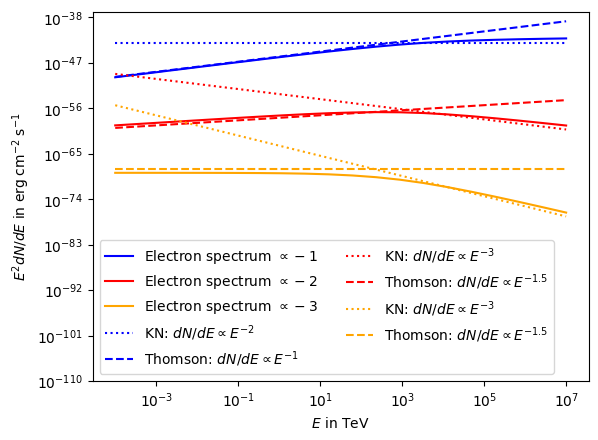

In [53]:
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e10*gamma_ray_energies**2*ic_spec_1_2p7K,label="Electron spectrum $\propto -1$",color="blue")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,gamma_ray_energies**2*ic_spec_2_2p7K,label="Electron spectrum $\propto -2$",color="red")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-10*gamma_ray_energies**2*ic_spec_3_2p7K,label="Electron spectrum $\propto -3$",color="orange")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-43*gamma_ray_energies**0,linestyle="dotted",label="KN: $dN/dE\propto E^{-2}$",color="blue")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-46*gamma_ray_energies**1,linestyle="dashed",label="Thomson: $dN/dE\propto E^{-1}$",color="blue")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-53*gamma_ray_energies**-1,linestyle="dotted",label="KN: $dN/dE\propto E^{-3}$",color="red")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-58*gamma_ray_energies**0.5,linestyle="dashed",label="Thomson: $dN/dE\propto E^{-1.5}$",color="red")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-63*gamma_ray_energies**-2,linestyle="dotted",label="KN: $dN/dE\propto E^{-3}$",color="orange")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-68*gamma_ray_energies**0,linestyle="dashed",label="Thomson: $dN/dE\propto E^{-1.5}$",color="orange")

plt.xlabel("$E$ in TeV")
plt.ylabel("$E^2dN/dE$ in $\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}^{-1}$")
plt.ylim(bottom=1e-110)
plt.legend(ncol=2)

For softer spectra, the Klein-Nishina effects set in a bit earlier. The spectral indices of the gamma rays relate to the electron spectra as follows (see e.g. Blumenthal & Gould 1970):

Thomson: alpha_gamma = (alpha_el+1)/2

Klein-Nishina alpha_gamma=alpha_el+1

In [57]:
ic_spec_2_20K=ic_spectrum(2,20,gamma_ray_energies)
ic_spec_2_100K=ic_spectrum(2,100,gamma_ray_energies)

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



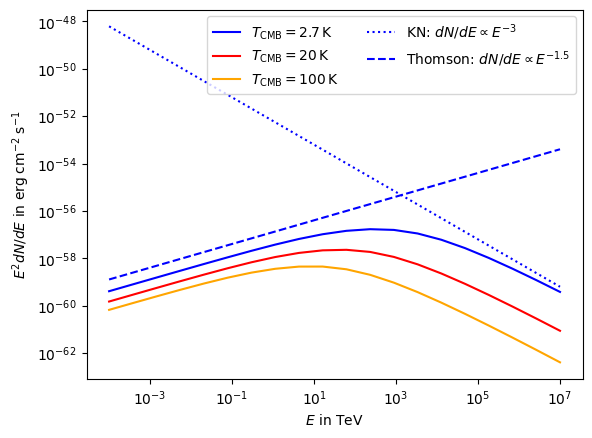

In [65]:
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,gamma_ray_energies**2*ic_spec_2_2p7K,label="$T_{\mathrm{CMB}}=2.7\,\mathrm{K}$",color="blue")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,gamma_ray_energies**2*ic_spec_2_20K,label="$T_{\mathrm{CMB}}=20\,\mathrm{K}$",color="red")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,gamma_ray_energies**2*ic_spec_2_100K,label="$T_{\mathrm{CMB}}=100\,\mathrm{K}$",color="orange")

plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-52*gamma_ray_energies**-1,linestyle="dotted",label="KN: $dN/dE\propto E^{-3}$",color="blue")
plt.loglog(gamma_ray_energies/gp.TeV_to_erg,1e-57*gamma_ray_energies**0.5,linestyle="dashed",label="Thomson: $dN/dE\propto E^{-1.5}$",color="blue")


plt.xlabel("$E$ in TeV")
plt.ylabel("$E^2dN/dE$ in $\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}^{-1}$")
#plt.ylim(bottom=1e-110)
plt.legend(ncol=2)

Clearly, a higher target photon temperature leads to an earlier onset of Klein-Nishina suppression, but the spectral index is not modified

### Task 2b

We'll et up a similar function as before, only this time calculating synchrotron radiation instead of Inverse Compton

In [66]:
def synchrotron_spectrum(index,B_field,synchrotron_energies):
    e = np.logspace(-4,8,200) * gp.TeV_to_erg # energy axis. Boundaries chosen super wide just to be safe, doesn't really matter
    power_law = e**-index # define power law, normalisation doesn't matter for this exercise
    particles = list(zip(e,power_law)) # input needs to be 2D-array
    fr = gp.Radiation()

    fr.SetBField(B_field)#In Gauss

    fr.SetDistance(2000)#parsec, doesn't really matter here
    fr.SetElectrons(particles)
    
    fr.CalculateDifferentialPhotonSpectrum(synchrotron_energies)
    synch_spec=np.array(fr.GetSynchrotronSpectrum())[:,1]

    return synch_spec

Let's vary the spectral index of the electrons

In [67]:
synchrotron_energies=np.geomspace(1e-4,1e6,20) * gp.eV_to_erg #Also here going super wide, but doesn't really matter. Note that it's in eV instead of TeV now
synch_spec_1_1muG=synchrotron_spectrum(1,1e-6,synchrotron_energies)
synch_spec_2_1muG=synchrotron_spectrum(2,1e-6,synchrotron_energies)
synch_spec_3_1muG=synchrotron_spectrum(3,1e-6,synchrotron_energies)

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



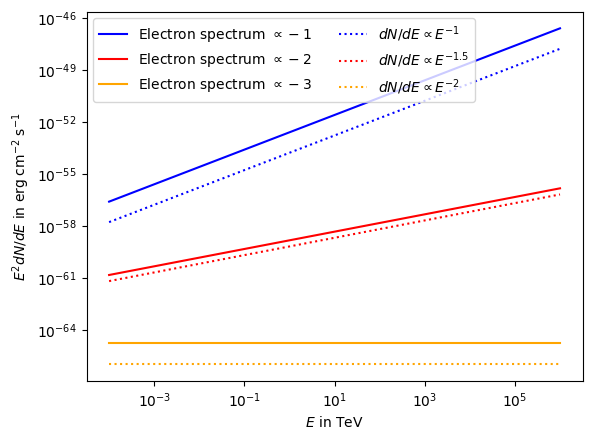

In [75]:
plt.loglog(synchrotron_energies/gp.eV_to_erg,1e5*synchrotron_energies**2*synch_spec_1_1muG,label="Electron spectrum $\propto -1$",color="blue")
plt.loglog(synchrotron_energies/gp.eV_to_erg,synchrotron_energies**2*synch_spec_2_1muG,label="Electron spectrum $\propto -2$",color="red")
plt.loglog(synchrotron_energies/gp.eV_to_erg,1e-5*synchrotron_energies**2*synch_spec_3_1muG,label="Electron spectrum $\propto -3$",color="orange")
plt.loglog(synchrotron_energies/gp.eV_to_erg,1e-42*synchrotron_energies**1,linestyle="dotted",label="$dN/dE\propto E^{-1}$",color="blue")
plt.loglog(synchrotron_energies/gp.eV_to_erg,5e-54*synchrotron_energies**0.5,linestyle="dotted",label="$dN/dE\propto E^{-1.5}$",color="red")
plt.loglog(synchrotron_energies/gp.eV_to_erg,1e-66*synchrotron_energies**0,linestyle="dotted",label="$dN/dE\propto E^{-2}$",color="orange")


plt.xlabel("$E$ in TeV")
plt.ylabel("$E^2dN/dE$ in $\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}^{-1}$")

plt.legend(ncol=2)

The relation is the same as for Inverse Compton Scattering in the Thomson Limit

Now, we vary the amgnetic field strength

In [76]:
synch_spec_2_1muG=synchrotron_spectrum(2,1e-6,synchrotron_energies)
synch_spec_2_10muG=synchrotron_spectrum(2,1e-5,synchrotron_energies)
synch_spec_2_100muG=synchrotron_spectrum(2,1e-4,synchrotron_energies)

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.

_________________________________________
>> CALCULATING SED FROM PARENT PARTICLES 
** Calculating differential gamma-ray emission:
    20 / 20 points calculated7 / 20 points calculated
    -> DONE!   

>> SED CALCULATION DONE. EXITING.



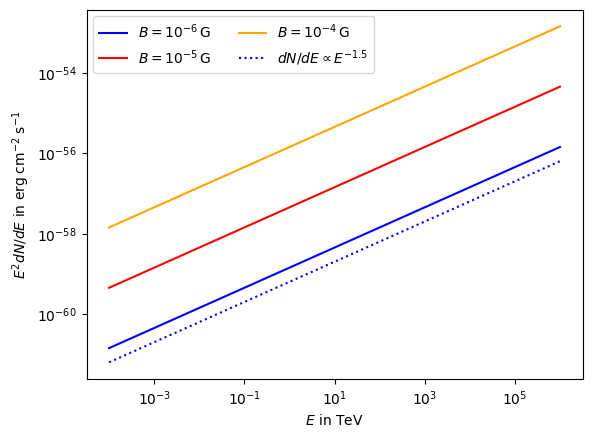

In [78]:
plt.loglog(synchrotron_energies/gp.eV_to_erg,synchrotron_energies**2*synch_spec_2_1muG,label="$B=10^{-6}\,\mathrm{G}$",color="blue")
plt.loglog(synchrotron_energies/gp.eV_to_erg,synchrotron_energies**2*synch_spec_2_10muG,label="$B=10^{-5}\,\mathrm{G}$",color="red")
plt.loglog(synchrotron_energies/gp.eV_to_erg,synchrotron_energies**2*synch_spec_2_100muG,label="$B=10^{-4}\,\mathrm{G}$",color="orange")

plt.loglog(synchrotron_energies/gp.eV_to_erg,5e-54*synchrotron_energies**0.5,linestyle="dotted",label="$dN/dE\propto E^{-1.5}$",color="blue")



plt.xlabel("$E$ in TeV")
plt.ylabel("$E^2dN/dE$ in $\mathrm{erg}\;\mathrm{cm}^{-2}\;\mathrm{s}^{-1}$")

plt.legend(ncol=2)

So the synchrotron intensity increases with the B-Field roughly as B squared